In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

#Definimos estados y priors 
#0 es cara y 1 sello 
state = np.array([0,1])
priorpi = np.array([0.2, 0.8]) #Prior dado por el ejercicio 

#Matrices de transmisión y emisión
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])

DictH = {0:'Cara',1:'Sello'}
DictO = {0:'Justa',1:'Sesgada'}

#Secuencia de lanzamientos 
obs = np.array([1 ,0 ,0 ,0 ,1 ,0 ,1 ,0])

def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    #print(CStates)
    return np.array(Permu)

HiddenStates = GetHiddenStates(state, 8)
HiddenStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [3]:
#Probabilidad 
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
         
    return p

dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,obs,HiddenStates[i],priorpi)

print(P)

[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.332800

In [4]:
PObs = np.sum(P)
print(PObs)

0.0019344381513984013


In [5]:
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


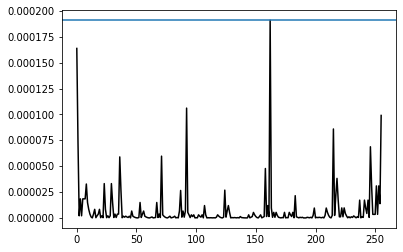

In [6]:
plt.plot(P,color='k')
plt.axhline(y=maxP)

In [7]:
ObsStates = GetHiddenStates([0,1],8)
ObsStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

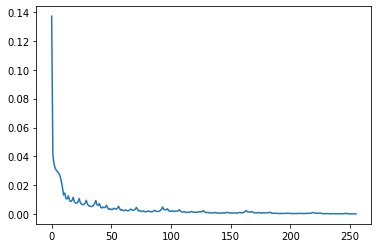

In [8]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],priorpi)
        
    PObs[j] = np.sum(P)
plt.plot(PObs)

In [9]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


In [11]:
sum_PObs = np.sum(PObs)

sum_PObs

1.0000000000000007

El resultado si depende de la probalidad a-priori debido a que ya verificamos que la suma de todos los estados observables es 1.